In [33]:
!pip install triangle

In [91]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial import Delaunay
from dataclasses import dataclass

In [92]:
@dataclass
class Cone:
    x: float
    y: float
    colour: int  # b0 - y1

BLUE = (0, 117/255, 242/255)
YELLOW = (210/255, 210/255, 0)

In [94]:
straight = np.array([
    Cone(0, 1.5, 1),
    Cone(0, -1.5, 0),
    Cone(3, 1.6, 1),
    Cone(3, -1.5, 0),
    Cone(8, 1.5, 1),
    Cone(8, -1.7, 0),
    Cone(12, 1.5, 1),
    Cone(12, -1.6, 0),
])

cones = np.array([(c.x, c.y) for c in straight])

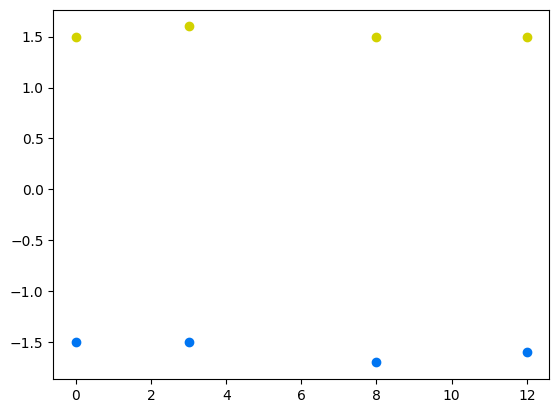

In [95]:
plt.scatter([x.x for x in straight if not x.colour], [x.y for x in straight if not x.colour], color=BLUE)
plt.scatter([x.x for x in straight if x.colour], [x.y for x in straight if x.colour], color=YELLOW)

In [96]:
tri = Delaunay(cones)
indices = tri.simplices
triangles = cones[indices]

center_points = (triangles + np.roll(triangles, 1, axis=1)) / 2
flattened_center_points = center_points.reshape((center_points.size // 2, 2))
unique_center_points = np.unique(flattened_center_points, axis=0)

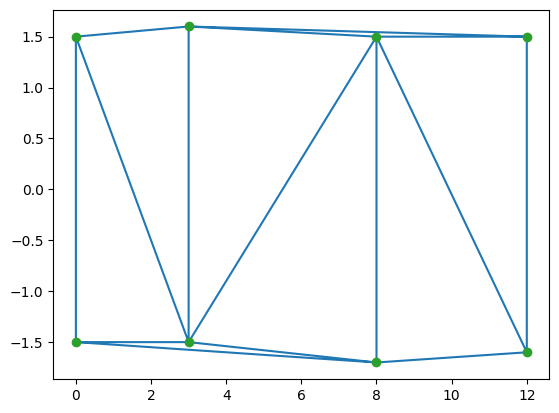

In [99]:
plt.triplot(cones[:,0], cones[:,1], tri.simplices)
plt.plot(cones[:,0], cones[:,1], 'o')

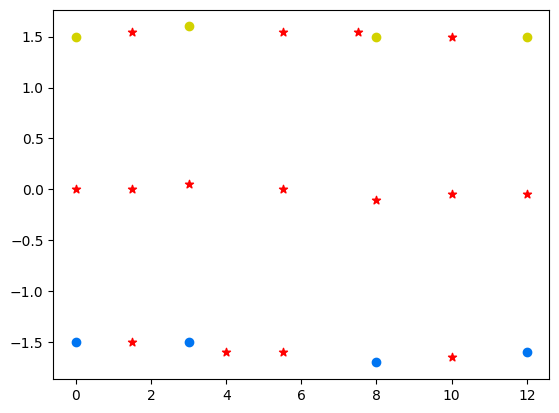

In [102]:
plt.scatter([x.x for x in straight if not x.colour], [x.y for x in straight if not x.colour], color=BLUE)
plt.scatter([x.x for x in straight if x.colour], [x.y for x in straight if x.colour], color=YELLOW)

plt.scatter(unique_center_points[:, 0], unique_center_points[:, 1], c='r', marker='*')